In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

In [15]:
data = pd.read_csv('Music Genre Classification/datasets/genre-dataset/features_30_sec.csv')

In [16]:
data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [17]:
# Extract features and labels
features = data.drop(columns=['filename', 'label','length'])
labels = data['label']

In [18]:
# Convert to NumPy arrays
X = features.to_numpy()
y = labels.to_numpy()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
# Define the model
class MusicGenreClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MusicGenreClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.out(x)
        return x

In [9]:
input_size = X_train.shape[1]
num_classes = len(set(y_train))
model = MusicGenreClassifier(input_size, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_loader))
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}')

# Save the trained model
torch.save(model.state_dict(), 'Music Genre Classification/music_genre_classifier.pth')

Epoch 1/100, Loss: 2.1293
Epoch 2/100, Loss: 1.6818
Epoch 3/100, Loss: 1.3500
Epoch 4/100, Loss: 1.1270
Epoch 5/100, Loss: 0.9922
Epoch 6/100, Loss: 0.8823
Epoch 7/100, Loss: 0.7917
Epoch 8/100, Loss: 0.7207
Epoch 9/100, Loss: 0.6508
Epoch 10/100, Loss: 0.5953
Epoch 11/100, Loss: 0.5578
Epoch 12/100, Loss: 0.5004
Epoch 13/100, Loss: 0.4639
Epoch 14/100, Loss: 0.4304
Epoch 15/100, Loss: 0.3925
Epoch 16/100, Loss: 0.3677
Epoch 17/100, Loss: 0.3373
Epoch 18/100, Loss: 0.3036
Epoch 19/100, Loss: 0.2865
Epoch 20/100, Loss: 0.2610
Epoch 21/100, Loss: 0.2457
Epoch 22/100, Loss: 0.2351
Epoch 23/100, Loss: 0.2122
Epoch 24/100, Loss: 0.1890
Epoch 25/100, Loss: 0.1770
Epoch 26/100, Loss: 0.1658
Epoch 27/100, Loss: 0.1502
Epoch 28/100, Loss: 0.1374
Epoch 29/100, Loss: 0.1252
Epoch 30/100, Loss: 0.1160
Epoch 31/100, Loss: 0.1061
Epoch 32/100, Loss: 0.1006
Epoch 33/100, Loss: 0.0898
Epoch 34/100, Loss: 0.0823
Epoch 35/100, Loss: 0.0758
Epoch 36/100, Loss: 0.0686
Epoch 37/100, Loss: 0.0637
Epoch 38/1

In [20]:
#Load the saved model instead
model.load_state_dict(torch.load('Music Genre Classification/music_genre_classifier.pth'))

<All keys matched successfully>

In [21]:
# Testing loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(targets.numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7350


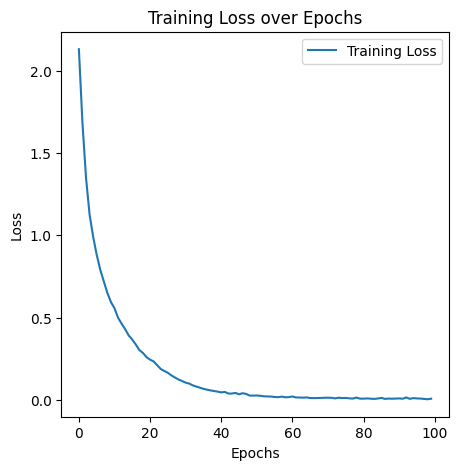

In [22]:
# Plotting training loss
plt.figure(figsize=(5, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()